### Import Necessary Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *

## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together. 

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”. 


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then 
     * Refines this guess by 
         * Repeatedly assigning examples to their closest centroids, and then 
         * Recomputing the centroids based on the assignments.

### 1.1 Finding closest centroids

The algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids. 

<a name="ex01"></a>

`find_closest_centroids` function:  
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids` 
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example .
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where 
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and 
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
 * $||x^{(i)} - \mu_j||$ is the L2-norm

In [2]:
def find_closest_centroids(X, centroids):
    """
    Computes the closest centroids for each example

    args:
        X = ndarray = (m, n)
        centroids = ndarry = (K, n)
        
    returns:
        idx = (m, ) = closest centroids 
    """
    # no of training example
    m= X.shape[0]
    # no of centroids
    K = centroids.shape[0]

    # initialize index array
    idx = np.zeros(m, dtype = int)

    for i in range (m):
        # array to hold distance between X[i] and each centroids[j]
        distances = np.zeros(K)

        for j in range (K):
            # calculate the norm between (X[i] - centroids[j])
            norm_ij = np.sum((X[i] - centroids[j]) ** 2)
            distances[j] = norm_ij
            
        # index of minimum value in distance that is closest to centroid
        idx[i] = np.argmin(distances)

    return idx


### 1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.

`compute_centroids` function recompute the value for each centroid:

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

    where 
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [3]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    m, n = X.shape

    centroids = np.zeros((K, n))

    for k in range (K):
        # find the points assigned to centroid k
        points = X[idx == k]

        #compute the mean of the points
        if (len(points) > 0):
            centroids[k] = np.mean(points, axis=0)

    return centroids


### Load the dataset

In [11]:
X = np.load("X.npy")

In [12]:
print("First 5 elements of X are: \n", X[:5])
print("Shape of x is: ", X.shape)

First 5 elements of X are: 
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
Shape of x is:  (300, 2)


In [13]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

### Random initialization
`kMeans_init_centroids` is implemented as below:
* The code first randomly shuffles the indices of the examples (using `np.random.permutation()`). 
* Then, it selects the first $K$ examples based on the random permutation of the indices. 
* This allows the examples to be selected at random without the risk of selecting the same example twice.

In [22]:
def kMeans_init_centroids(X, K):
    """
    X = ndarray = data points
    K = int = number of centroids
    """
    # randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids

### Run KMeans

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


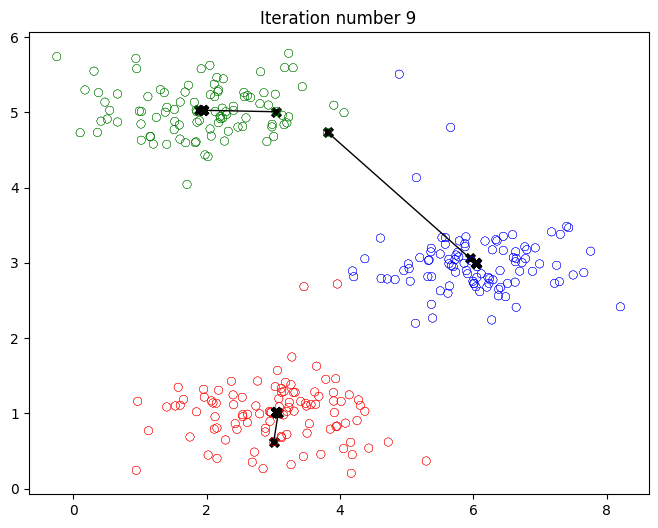

In [23]:
# set number of centroids and max number of iterations
K = 3
max_iters = 10

# set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# run Kmeans
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress = True)